<a href="https://colab.research.google.com/github/Matteomtt/exercice-prise-en-main/blob/main/Human_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import io
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

In [8]:
uploaded = files.upload()

Saving stress_classification.csv to stress_classification.csv


In [9]:
df = pd.read_csv("stress_classification.csv", delimiter=';')

In [ ]:
df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.isnull().any()

snoring_range          False
respiration_rate       False
body_temperature       False
limb_movement_rate     False
blood_oxygen_levels    False
rapid_eye_movement     False
hour_of_sleep          False
heart_rate             False
stress_level           False
dtype: bool

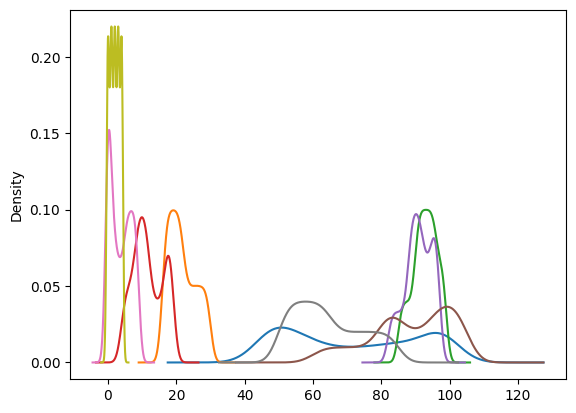

In [11]:
df['snoring_range'].plot(kind='kde')
df['respiration_rate'].plot(kind='kde')
df['body_temperature'].plot(kind='kde')
df['limb_movement_rate'].plot(kind='kde')
df['blood_oxygen_levels'].plot(kind='kde')
df['rapid_eye_movement'].plot(kind='kde')
df['hour_of_sleep'].plot(kind='kde')
df['heart_rate'].plot(kind='kde')
df['stress_level'].plot(kind='kde')
plt.show()



<Axes: >

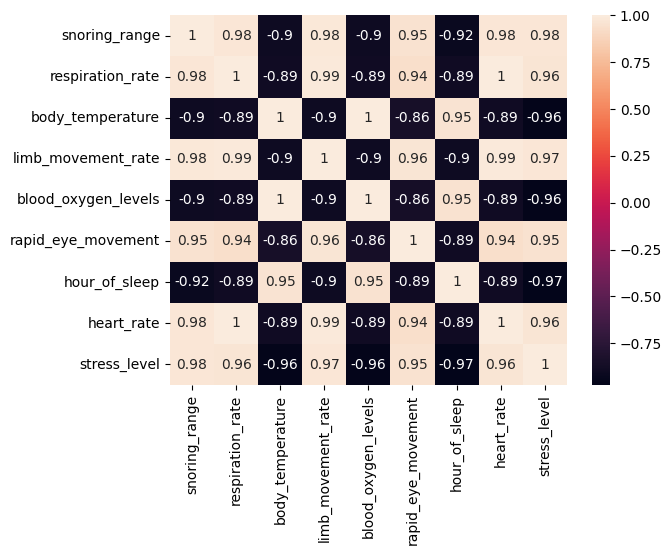

In [ ]:
sns.heatmap(df.corr(),annot=True)

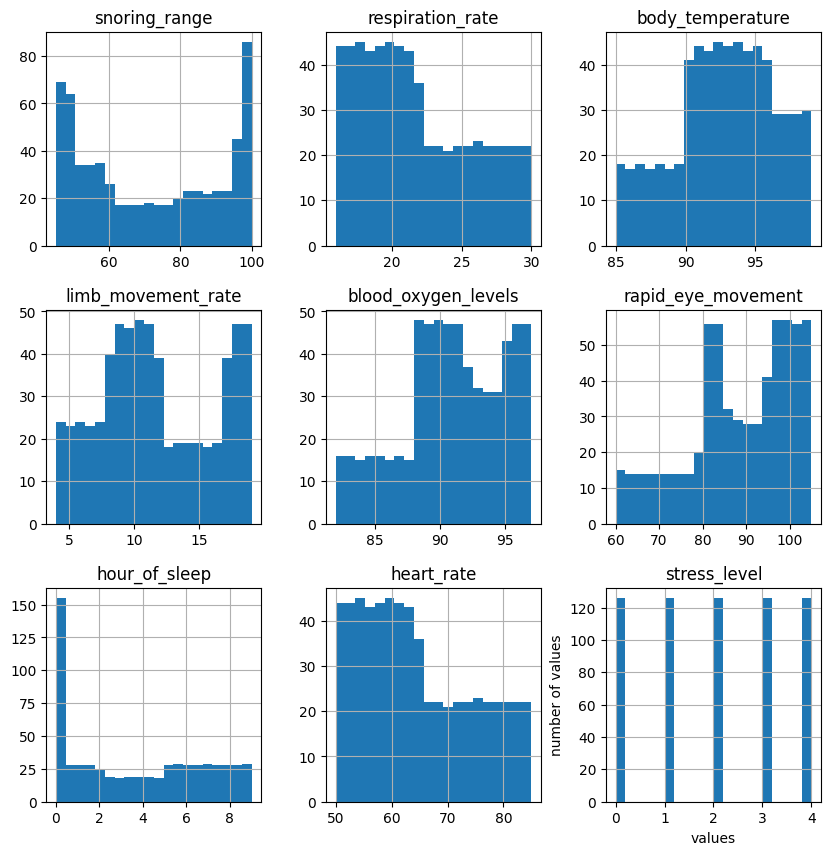

In [10]:
df.hist(bins=20, figsize=(10,10))
plt.xlabel('values')
plt.ylabel('number of values')
plt.show()

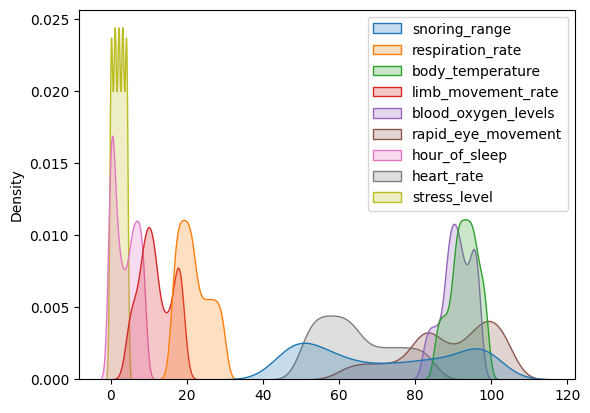

In [13]:
sns.kdeplot(data=df[['snoring_range', 'respiration_rate', 'body_temperature', 'limb_movement_rate',
       'blood_oxygen_levels', 'rapid_eye_movement', 'hour_of_sleep',
       'heart_rate', 'stress_level']], fill=True)
plt.show()

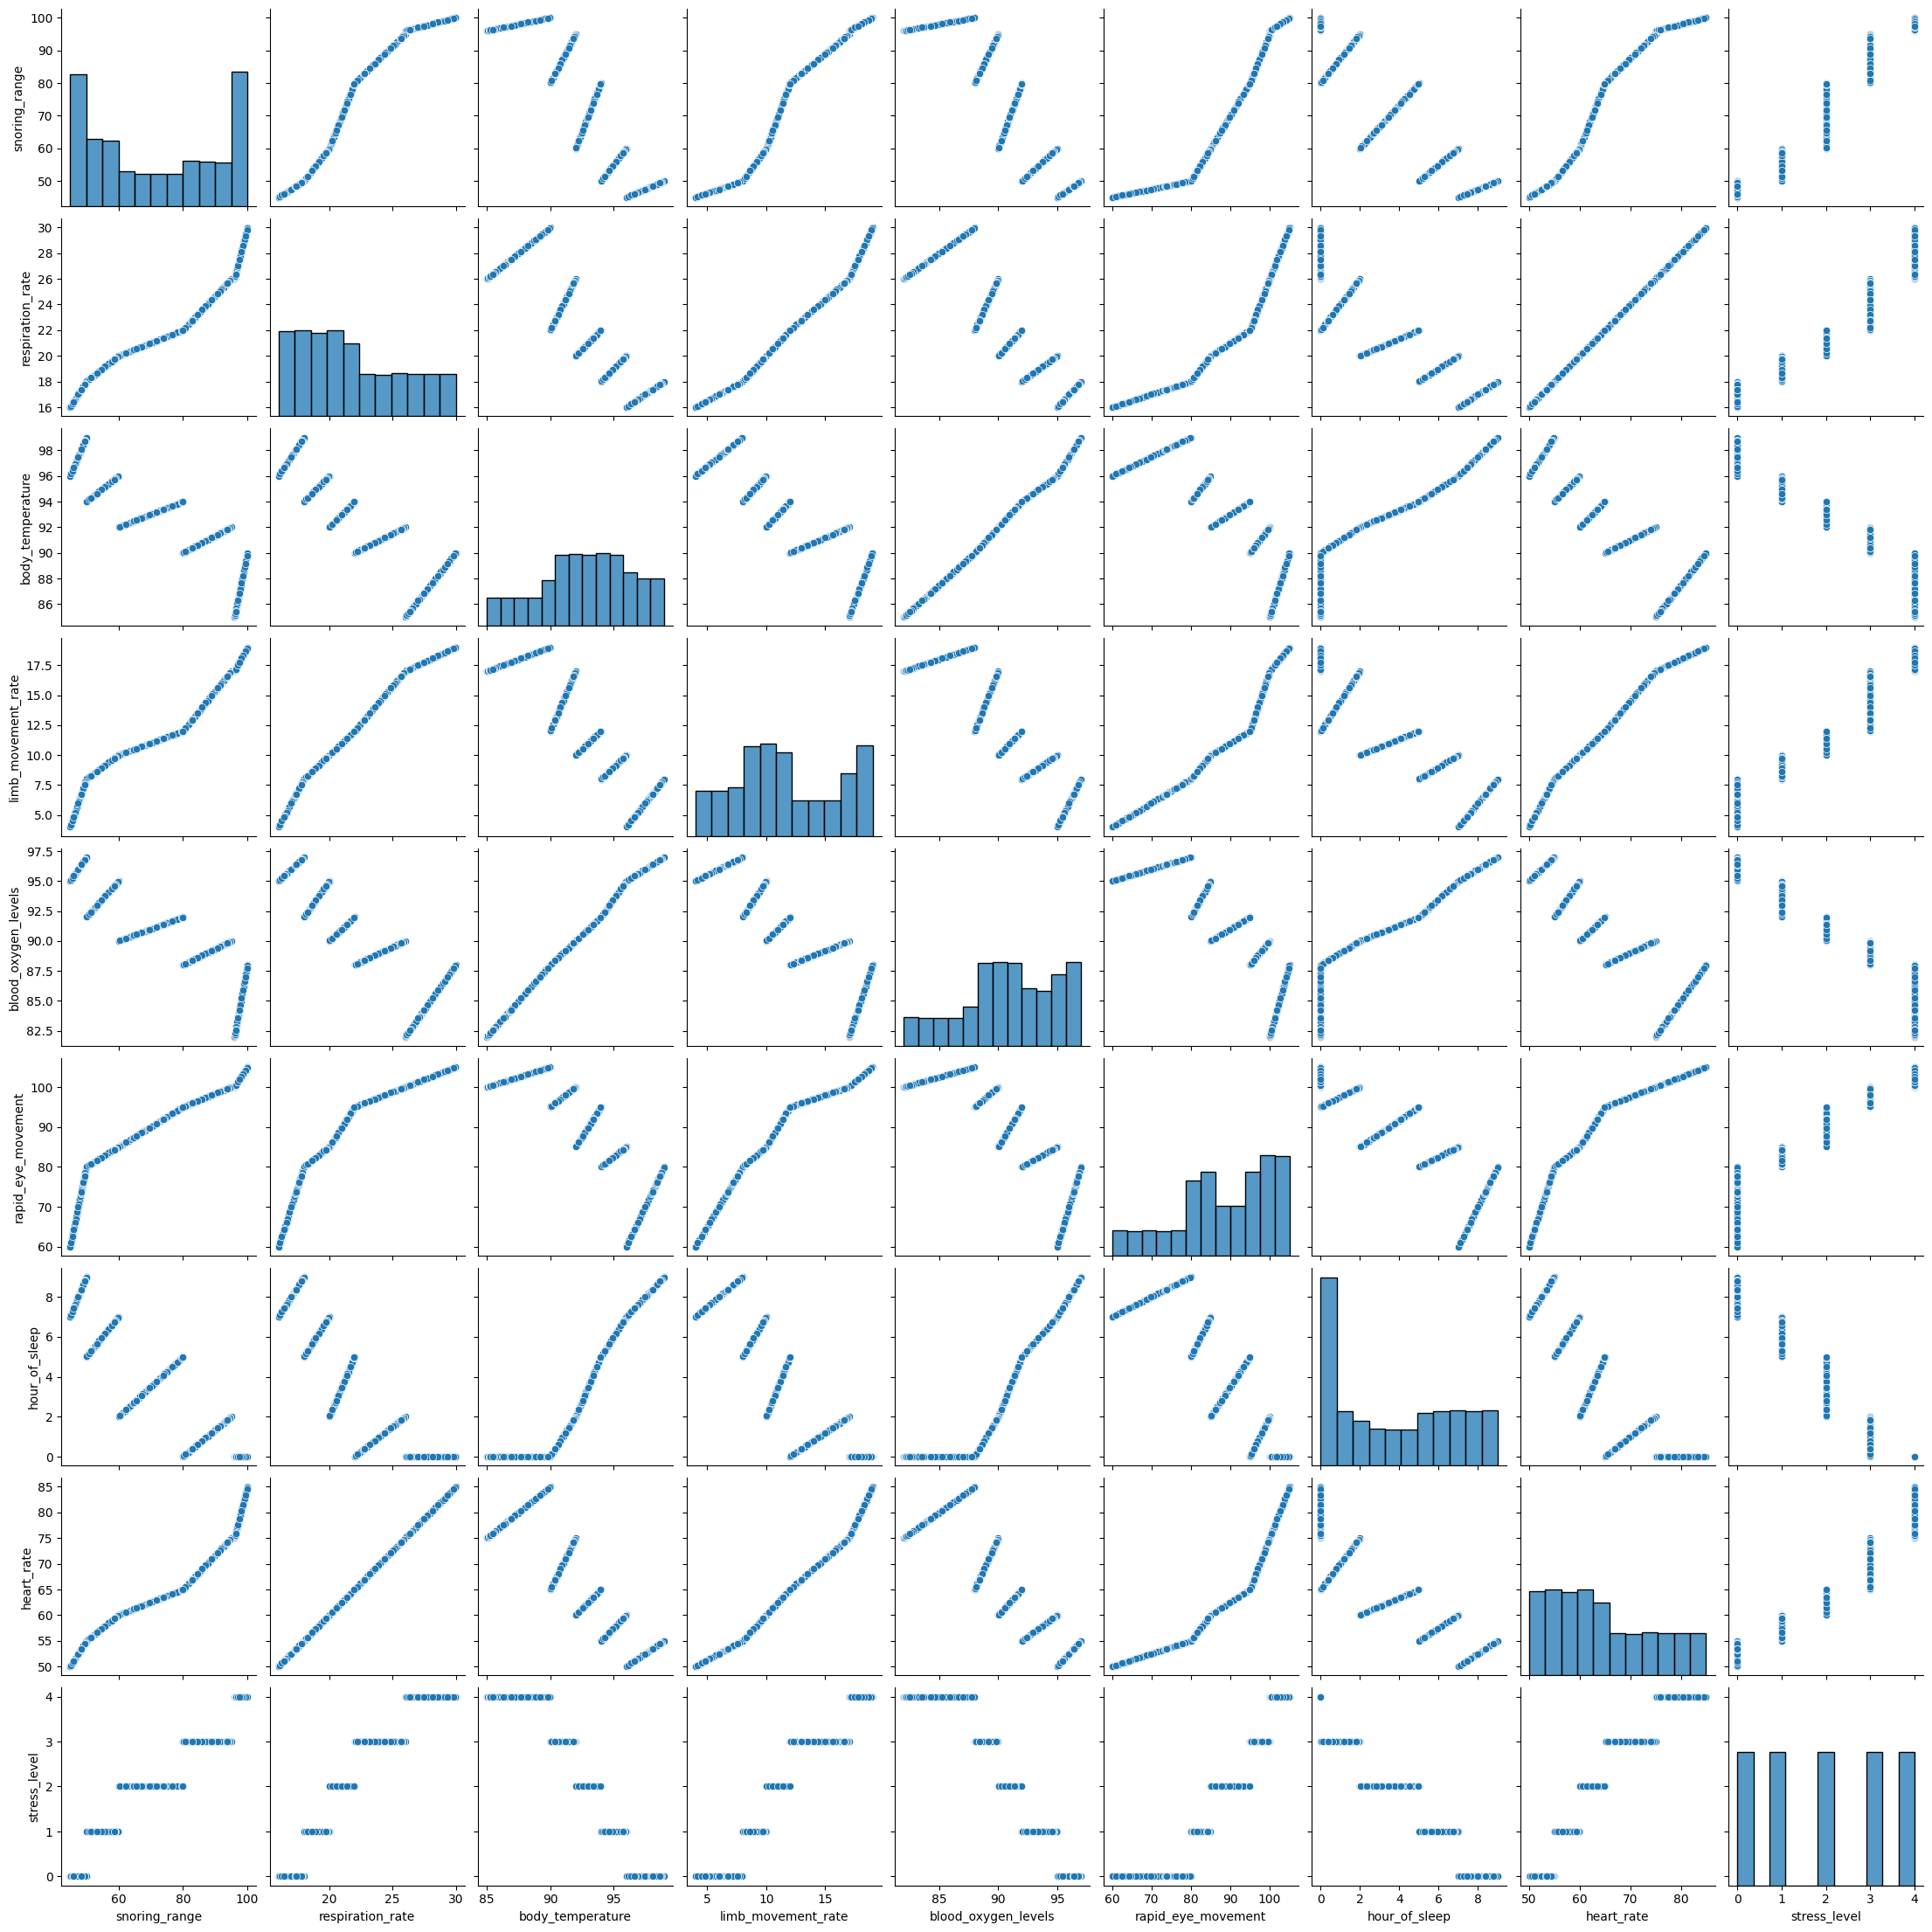

In [14]:
sns.pairplot(df)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop("stress_level",axis=1)
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)


Training dataset shape: (504, 8) (504,)
Testing dataset shape: (126, 8) (126,)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data:\n", X_train_scaled)
print("Scaled testing data:\n", X_test_scaled)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data:\n", X_train_scaled)
print("Scaled testing data:\n", X_test_scaled)

Scaled training data:
 [[-1.30163292 -1.32748785  1.10855098 ... -1.94209536  1.22650302
  -1.32748785]
 [-1.26261291 -1.25157568  1.2384575  ... -1.69024595  1.32591933
  -1.25157568]
 [-0.92786224 -0.7761258   0.52739025 ... -0.55029597  0.64047005
  -0.7761258 ]
 ...
 [ 1.39937366  1.75694333 -1.22292913 ...  1.25572944 -1.22489384
   1.75694333]
 [ 0.06201395 -0.13287007  0.12171727 ...  0.24833178  0.05705329
  -0.13287007]
 [-1.36324348 -1.44734916  0.90343543 ... -2.33975233  1.06952991
  -1.44734916]]
Scaled testing data:
 [[-1.15171392 -1.03582531  1.60766549 ... -0.9744634   1.60847095
  -1.03582531]
 [ 0.48096571  0.11084793 -0.77623304 ...  0.57308497 -1.18303434
   0.11084793]
 [-0.34872306 -0.33263893 -0.1061889  ... -0.08304903 -0.3353795
  -0.33263893]
 ...
 [-0.32407884 -0.3206528  -0.09251453 ... -0.06316618 -0.31183354
  -0.3206528 ]
 [ 1.44373326  1.9726937  -0.9152558  ...  1.34520226 -1.22489384
   1.9726937 ]
 [ 0.90607851  0.66220998 -0.46172252 ...  0.80173773 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data:\n", X_train_scaled)
print("Scaled testing data:\n", X_test_scaled)



Scaled training data:
 [[2.25454545e-02 3.54285714e-02 8.38857143e-01 ... 1.10222222e-01
  8.32888889e-01 3.54285714e-02]
 [3.63636364e-02 5.71428571e-02 8.71428571e-01 ... 1.77777778e-01
  8.66666667e-01 5.71428571e-02]
 [1.54909091e-01 1.93142857e-01 6.93142857e-01 ... 4.83555556e-01
  6.33777778e-01 1.93142857e-01]
 ...
 [9.79054545e-01 9.17714286e-01 2.54285714e-01 ... 9.68000000e-01
  0.00000000e+00 9.17714286e-01]
 [5.05454545e-01 3.77142857e-01 5.91428571e-01 ... 6.97777778e-01
  4.35555556e-01 3.77142857e-01]
 [7.27272727e-04 1.14285714e-03 7.87428571e-01 ... 3.55555556e-03
  7.79555556e-01 1.14285714e-03]]
Scaled testing data:
 [[0.07563636 0.11885714 0.964      ... 0.36977778 0.96266667 0.11885714]
 [0.65381818 0.44685714 0.36628571 ... 0.78488889 0.01422222 0.44685714]
 [0.36       0.32       0.53428571 ... 0.60888889 0.30222222 0.32      ]
 ...
 [0.36872727 0.32342857 0.53771429 ... 0.61422222 0.31022222 0.32342857]
 [0.99476364 0.97942857 0.33142857 ... 0.992      0.      

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = df[['hour_of_sleep']] 
y = df['stress_level']

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    print("k =", k, " ->  Accuracy:", scores.mean())


k_best = 5

knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
     


k = 1  ->  Accuracy: 1.0
k = 2  ->  Accuracy: 1.0
k = 3  ->  Accuracy: 1.0
k = 4  ->  Accuracy: 1.0
k = 5  ->  Accuracy: 1.0
k = 6  ->  Accuracy: 1.0
k = 7  ->  Accuracy: 1.0
k = 8  ->  Accuracy: 1.0
k = 9  ->  Accuracy: 1.0
k = 10  ->  Accuracy: 1.0


KNeighborsClassifier()

Matrice de confusion : 
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


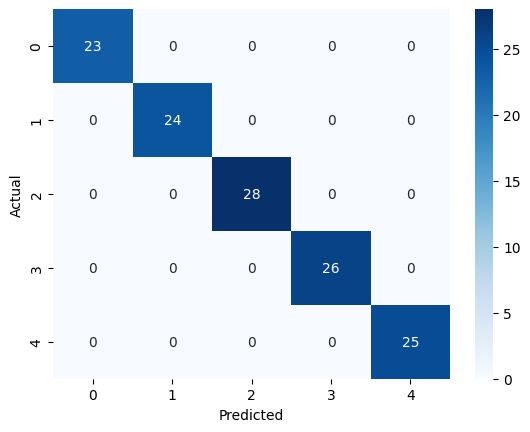

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Matrice de confusion : \n{cm}")

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#We can see that the KNN model is performing very well with no wrong values and an accurency of 1 for each tested values of k. We can try on an other serie of data too see the result.

In [42]:
X = df[['heart_rate']] 
y = df['stress_level']

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    print("k =", k, " ->  Accuracy:", scores.mean())


k_best = 5

knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
     


k = 1  ->  Accuracy: 1.0
k = 2  ->  Accuracy: 1.0
k = 3  ->  Accuracy: 1.0
k = 4  ->  Accuracy: 1.0
k = 5  ->  Accuracy: 1.0
k = 6  ->  Accuracy: 1.0
k = 7  ->  Accuracy: 1.0
k = 8  ->  Accuracy: 1.0
k = 9  ->  Accuracy: 1.0
k = 10  ->  Accuracy: 1.0


KNeighborsClassifier()

Matrice de confusion : 
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


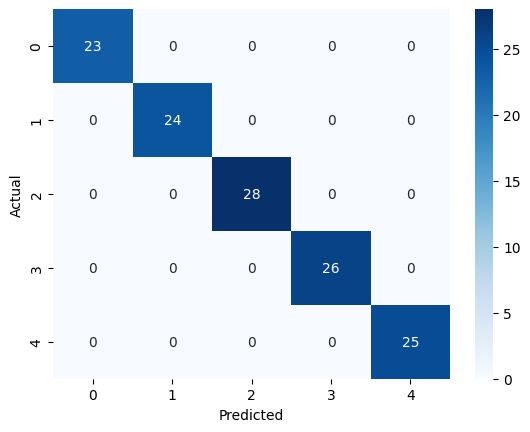

In [43]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Matrice de confusion : \n{cm}")

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#We have the same results.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 97.62%


In [ ]:
#We can see that for the same accurency metrics, the KNN model is more reliable than the Tree model.